# Datos de panel

Los datos de panel son datos que combinan una dimensión _temporal_ (tienen distintos cortes en el tiempo, con o sin regularidad) con una o más dimensiones _transversales_ (espacio -paises, provincias, departamentos-, productos, dependencias del estado, características sociodemográficas).

## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [1]:
import pandas as pd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [2]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

`seaborn` es una librería que permite hacer gráficos más avanzados con menos código.

In [208]:
import seaborn as sns

## Gráficos simples y correlación de variables

Vamos a usar los datos de estadísticas de trámites automotores (https://datos.gob.ar/dataset/justicia_1ab0cc03-ab9b-4520-975c-5757d87d1061) y de motovehículos (https://datos.gob.ar/dataset/justicia_72d85f23-b751-4d12-935b-25e32ed9445e). El último CSV disponible en cada dataset incluye toda la historia.

In [25]:
# tomamos los datos de Estadísticas de Trámites Automotores
autos = pd.read_csv("http://datos.jus.gob.ar/dataset/1ab0cc03-ab9b-4520-975c-5757d87d1061/resource/4358c995-bb04-4ad9-be4a-a9076dc3e42c/download/estadistica-inscripciones-iniciales-automotores-2019-02.csv")
motos = pd.read_csv("http://datos.jus.gob.ar/dataset/72d85f23-b751-4d12-935b-25e32ed9445e/resource/d523dd08-5c12-467e-b947-aa3206a24d21/download/estadistica-inscripciones-iniciales-motovehiculos-2019-02.csv")

In [26]:
autos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
0,Automotores,2000,1,Buenos Aires,B,16346,6
1,Automotores,2000,1,Catamarca,K,361,10
2,Automotores,2000,1,Chaco,H,551,22
3,Automotores,2000,1,Chubut,U,802,26
4,Automotores,2000,1,Ciudad Autónoma de Bs.As.,C,8892,2


In [27]:
motos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
0,Motovehículos,2000,1,Buenos Aires,B,1666,6.0
1,Motovehículos,2000,1,Catamarca,K,80,10.0
2,Motovehículos,2000,1,Chaco,H,85,22.0
3,Motovehículos,2000,1,Chubut,U,43,26.0
4,Motovehículos,2000,1,Ciudad Autónoma de Bs.As.,C,292,2.0


Ambos tienen la misma estructura. Chequeamos cuál es la "clave primaria" o el conjunto de dimensiones que nos permiten identinficar una única fila en la tabla.

In [28]:
len(autos.drop_duplicates())

5520

In [29]:
len(autos[["anio_inscripcion_inicial", "mes_inscripcion_inicial"]].drop_duplicates())

230

El tiempo no es clave primaria de esta tabla, porque los meses (230) no alcanzan para identificar todas las filas. Existe por lo menos una dimensión de apertura más.

In [30]:
len(autos[["anio_inscripcion_inicial", "mes_inscripcion_inicial", "provincia_inscripcion_inicial"]].drop_duplicates())

5520

Este es un panel cuya "clave primaria" es mes-provincia. Son las dos dimensiones de apertura que tienen los datos que contiene.

Ahora vas a agregar los datos por año y ver la evolución en el tiempo de las inscripciones de autos. Para esto tenés que elegir:

1. El o los campos de la tabla por los que vas a agrupar los datos
2. La función de agregación (suma, promedio, máximo, mínimo, etc)
3. El o los campos con los que te querés quedar, en donde esta agregación _tiene sentido_

In [31]:
autos_inscripciones_anuales = autos.groupby("anio_inscripcion_inicial").sum()["cantidad_inscripciones_iniciales"]
autos_inscripciones_anuales

anio_inscripcion_inicial
2000    352811
2001    206653
2002    101231
2003    146047
2004    292479
2005    389234
2006    452582
2007    572841
2008    615256
2009    516799
2010    665552
2011    860820
2012    845562
2013    963598
2014    688480
2015    657161
2016    711446
2017    902733
2018    805143
2019    100479
Name: cantidad_inscripciones_iniciales, dtype: int64

El año 2019 acaba de empezar, así que no sirve para una agregación anual.

In [32]:
autos_inscripciones_anuales = autos_inscripciones_anuales[autos_inscripciones_anuales.index < 2019]

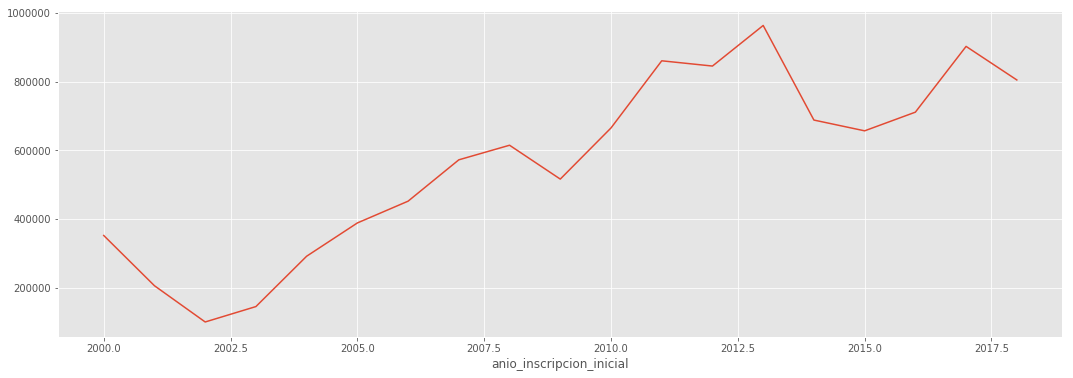

In [46]:
autos_inscripciones_anuales.plot(figsize=(18,6))

El eje X que muestra el año no parece muy útil... se puede especificar las etiquetas de un eje explícitamente.

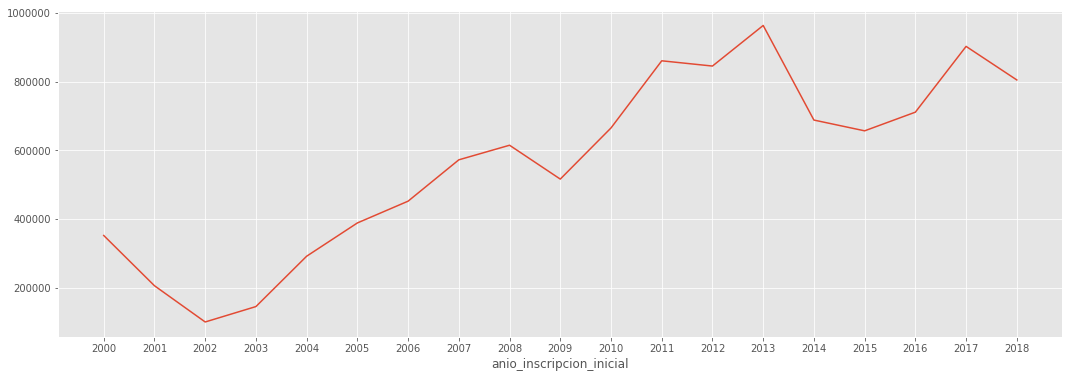

In [47]:
autos_inscripciones_anuales.plot(figsize=(18,6), xticks=autos_inscripciones_anuales.index)

Esta serie tiene un parecido notable con el nivel de actividad económica. Deberías ver si hay alguna correlación entre las inscripciones de autos por año y el Producto Bruto Interno.

En datos.gob.ar/series podés buscar entre más de 20 mil series de tiempo y copiar el link de descarga CSV. La serie de PBI anual a precios constantes se puede ver en: https://datos.gob.ar/series/api/series/?ids=9.1_PP2_2004_A_16.

In [48]:
pbi = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=9.1_PP2_2004_A_16&limit=5000&format=csv")

In [54]:
pbi

,indice_tiempo,pib_precios_2004
0,2004-01-01,485115.195206
1,2005-01-01,528055.942503
2,2006-01-01,570549.404221
3,2007-01-01,621942.502646
4,2008-01-01,647176.159741
5,2009-01-01,608872.876413
6,2010-01-01,670523.679442
7,2011-01-01,710781.597221
8,2012-01-01,703485.989459
9,2013-01-01,720407.105303


Necesitás que ambas series tengan el mismo índice para poder graficarlas juntas, así que vas a construir la variable "anio". Para esto hay que la fecha y asignarla como índice del dataframe.

In [72]:
# transforma el tipo de la variable de texto a fecha
pbi["indice_tiempo"] = pd.to_datetime(pbi.indice_tiempo)

# extrae el año de la fecha para el índice
pbi.index = pbi.indice_tiempo.dt.year

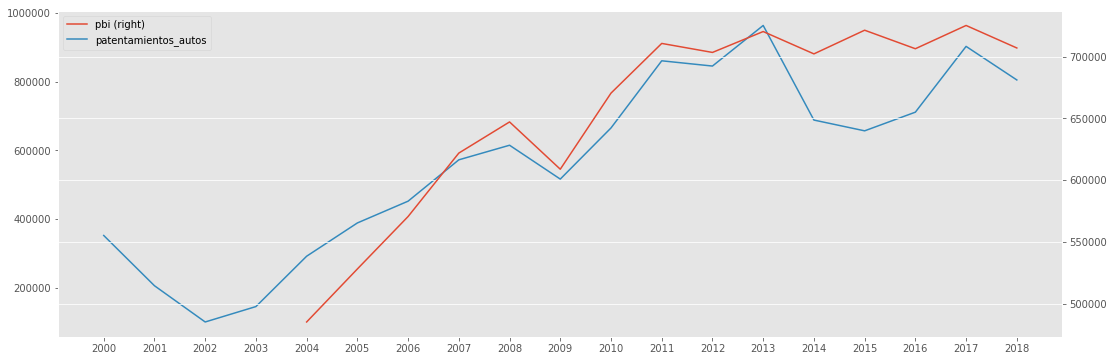

In [75]:
pbi_patentamientos = pd.DataFrame({
    "pbi": pbi.pib_precios_2004, 
    "patentamientos_autos": autos_inscripciones_anuales
})
pbi_patentamientos.plot(secondary_y="pbi", figsize=(18,6), xticks=pbi_patentamientos.index)

In [76]:
pbi_patentamientos.corr()

,pbi,patentamientos_autos
pbi,1.00000,0.92102
patentamientos_autos,0.92102,1.00000


**Ejercicio:** repetir todo el ejercicio para analizar si la correlación entre el PBI y los patentamientos de autos es mayor o menos que entre el PBI y los patentamientos de motos. Hint: recordá que la estructura de ambas tablas es la misma, así que podés reutilizar todo el código.

## Estacionalidad y promedio móvil

Ahora queremos hacer _zoom_ en cómo se comportan los patentamientos de autos a lo largo del año. Vamos a tener que crear un índice de tiempo para el dataframe de autos que incluya al mes. El año sólo no nos sirve, y ambos están separados en columnas diferentes.

In [77]:
autos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
0,Automotores,2000,1,Buenos Aires,B,16346,6
1,Automotores,2000,1,Catamarca,K,361,10
2,Automotores,2000,1,Chaco,H,551,22
3,Automotores,2000,1,Chubut,U,802,26
4,Automotores,2000,1,Ciudad Autónoma de Bs.As.,C,8892,2


`Pandas` permite crear funciones que reciben fila por fila (o columna por columna) del dataframe y realizan alguna operación. Luego de crearla podés aplicarla al dataframe (que recorre todas las filas usando la función) y guardar el resultado en una nueva columna.

In [78]:
def crear_indice_tiempo(row):
    mes_str = "{}-{}".format(row["anio_inscripcion_inicial"], row["mes_inscripcion_inicial"])
    return pd.to_datetime(mes_str)

In [79]:
autos["indice_tiempo"] = autos.apply(crear_indice_tiempo, axis=1)

Ahora tenés que agrupar los datos sumando patentamientos de todas las provincias por mes. Pero vos ya sabés hacer esto.

**Ejercicio (obligatorio)**: crear la variable `autos_inscripciones_cant` que sea la cantidad total de patentamientos por mes que se hacen en la Argentina.

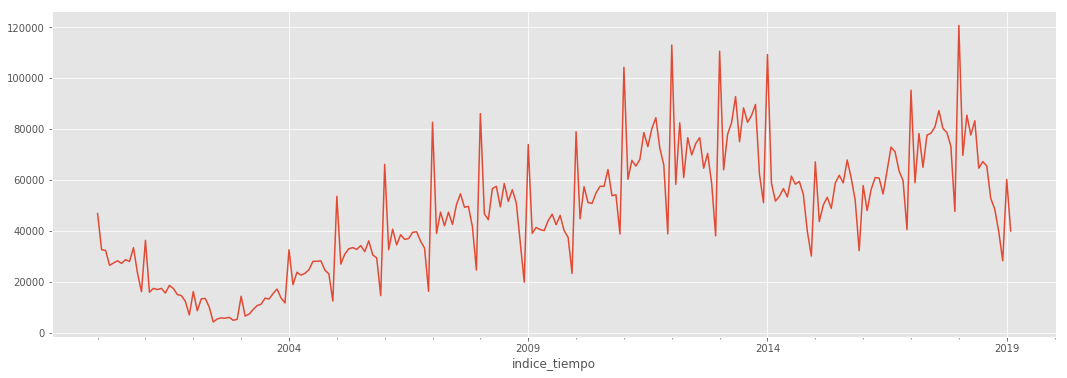

In [83]:
autos_inscripciones_cant.plot(figsize=(18,6))

Es difícil entender la tendencia en algunos períodos con tanta estacionalidad! Una forma fácil de removerla es grafical el promedio móvil de los últimos 12 meses, para cada mes.

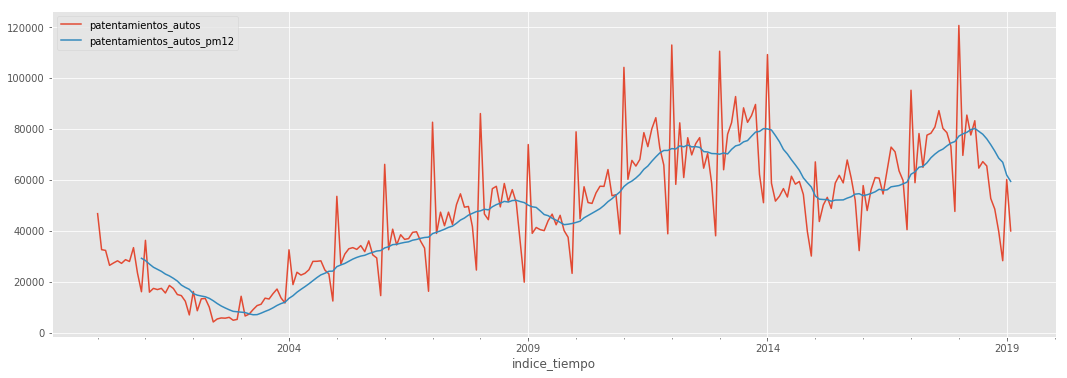

In [88]:
autos_estacionalidad = pd.DataFrame({
    "patentamientos_autos": autos_inscripciones_cant,
    "patentamientos_autos_pm12": autos_inscripciones_cant.rolling(12).mean()
})
autos_estacionalidad.plot(figsize=(18,6))

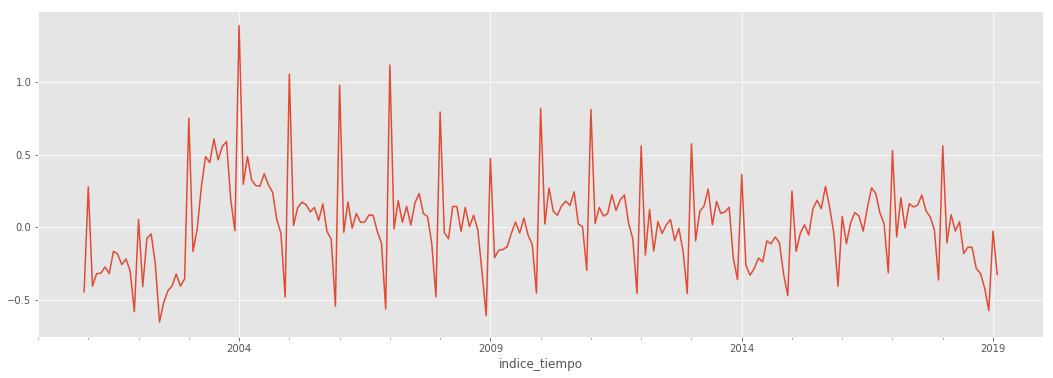

In [106]:
estacionalidad_sin_tendencia = (autos_estacionalidad.patentamientos_autos - autos_estacionalidad.patentamientos_autos_pm12) / autos_estacionalidad.patentamientos_autos_pm12
estacionalidad_sin_tendencia.plot(figsize=(18,6))

In [109]:
# meses con picos de patentamientos
estacionalidad_sin_tendencia[estacionalidad_sin_tendencia > 0.5]

indice_tiempo
2003-01-01    0.751711
2003-07-01    0.608581
2003-09-01    0.557373
2003-10-01    0.590449
2004-01-01    1.391644
2005-01-01    1.056588
2006-01-01    0.979427
2007-01-01    1.118345
2008-01-01    0.795371
2010-01-01    0.817971
2011-01-01    0.812385
2012-01-01    0.561004
2013-01-01    0.575154
2017-01-01    0.528115
2018-01-01    0.561646
dtype: float64

In [113]:
# meses con pisos de patentamientos
estacionalidad_sin_tendencia[estacionalidad_sin_tendencia < -0.45]

indice_tiempo
2001-12-01   -0.583011
2002-06-01   -0.653927
2002-07-01   -0.519684
2004-12-01   -0.481604
2005-12-01   -0.545137
2006-12-01   -0.563703
2007-12-01   -0.480715
2008-12-01   -0.609255
2009-12-01   -0.454635
2011-12-01   -0.456137
2012-12-01   -0.457364
2014-12-01   -0.472124
2018-12-01   -0.575916
dtype: float64

Diciembre es un mes donde se patentan muy pocos autos y en enero es un mes donde hay picos de patentamiento, que en buena medida los compensan. ¿Sabés por qué?

**Ejercicio:** crear una función que junte provincia y id en una nueva columna, poniendo el id entre paréntesis como en "Buenos Aires (06)" y aplicarla para crear "provincia_nombre_id".

**Ejercicio para la casa:** repetir el análisis de estacionalidad para el caso de las motos. ¿Se verifica el mismo efecto en diciembre y enero?

## Graficar abriendo por una dimensión transversal

Hasta acá viste algunas cosas interesantes que se pueden ver a partir de los datos de patentamiento de autos a nivel nacional. Los patentamientos correlacionan fuertemente con el nivel de actividad y su estacionalidad tiene algunas pecularidades...

Pero probablemente haya diferencias por provincias (una dimensión transversal disponible en la tabla) que merezca la pena notar.

Ahora vas a tratar de graficar la evolución anual en los patentamientos para cada provincia.

In [178]:
# agrupamos por año y por provincia
autos_anio_prov = autos[autos.anio_inscripcion_inicial < 2019].groupby(
    ["anio_inscripcion_inicial", "provincia_inscripcion_inicial"]
).sum()["cantidad_inscripciones_iniciales"]

autos_anio_prov

anio_inscripcion_inicial  provincia_inscripcion_inicial
2000                      Buenos Aires                     116665
                          Catamarca                          2469
                          Chaco                              4117
                          Chubut                             6550
                          Ciudad Autónoma de Bs.As.         76343
                          Corrientes                         5027
                          Córdoba                           35797
                          Entre Ríos                         7688
                          Formosa                            2461
                          Jujuy                              4087
                          La Pampa                           3255
                          La Rioja                           2790
                          Mendoza                           11887
                          Misiones                           5323
                    

In [179]:
# tenemos que reiniciar el índice, para crear una serie de tiempo por provincia
autos_anio_prov = autos_anio_prov.reset_index()
autos_anio_prov.head()

,anio_inscripcion_inicial,provincia_inscripcion_inicial,cantidad_inscripciones_iniciales
0,2000,Buenos Aires,116665
1,2000,Catamarca,2469
2,2000,Chaco,4117
3,2000,Chubut,6550
4,2000,Ciudad Autónoma de Bs.As.,76343


In [180]:
# la función pivot_table permite hacer lo mismo que las tablas dinámicas en Excel
autos_series_provinciales = autos_anio_prov.pivot_table(index="anio_inscripcion_inicial", columns="provincia_inscripcion_inicial")
autos_series_provinciales

cantidad_inscripciones_iniciales            \
provincia_inscripcion_inicial                     Buenos Aires Catamarca   
anio_inscripcion_inicial                                                   
2000                                                    116665      2469   
2001                                                     63662      1381   
2002                                                     30166       578   
2003                                                     40104       443   
2004                                                     84576       902   
2005                                                    117888      1611   
2006                                                    136994      2491   
2007                                                    177389      3495   
2008                                                    191230      4074   
2009                                                    168093      3337   
2010                                                    219215      3860   
2011                                                    283057      5831   
2012                                                    281156      6471   
2013                                                    326954      7316   
2014                                                    219355      5731   
2015                                                    208990      5631   
2016                                                    232919      6030   
2017                                                    287748      7531   
2018                                                    241626      7199   

                                                                       \
provincia_inscripcion_inicial  Chaco Chubut Ciudad Autónoma de Bs.As.   
anio_inscripcion_inicial                                                
2000                            4117   6550                     76343   
2001                            2610   5373                     51946   
2002                            1368   2451                     24793   
2003                            2075   4170                     34042   
2004                            4325   7361                     66582   
2005                            5353   9416                     88108   
2006                            6504  11520                    100253   
2007                            8435  13586                    119100   
2008                           11877  15111                    116400   
2009                            9772  11981                     96479   
2010                            9658  13513                    123518   
2011                           14358  16788                    144434   
2012                           13997  17204                    139192   
2013                           15851  18272                    164739   
2014                           12816  15629                    109713   
2015                           13886  15575                     97881   
2016                           15421  14708                    106175   
2017                           21080  17717                    137462   
2018                           19201  16643                    128751   

                                                                            \
provincia_inscripcion_inicial Corrientes Córdoba Entre Ríos Formosa  Jujuy   
anio_inscripcion_inicial                                                     
2000                                5027   35797       7688    2461   4087   
2001                                2764   19669       3561    1437   1768   
2002                                1432   11727       1661     547    953   
2003                                2139   18071       3120     800   1426   
2004                                4289   31778       6719    1400   3317   
2005                                5888   39892       8729    2214   4055   
2006                                7063   45781

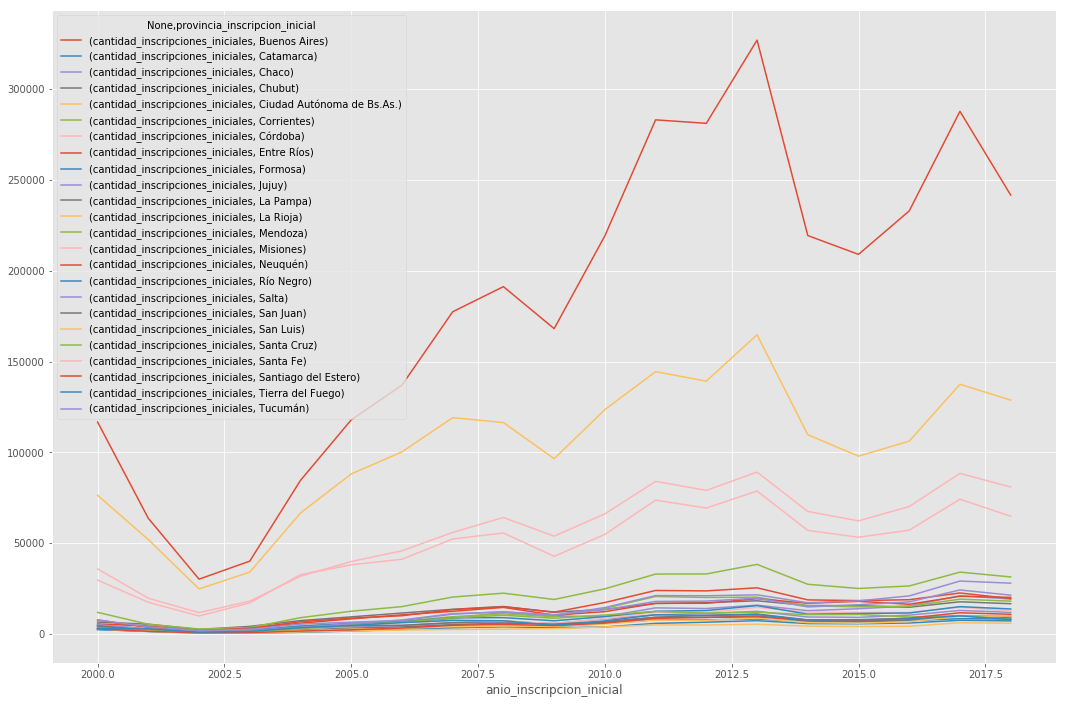

In [181]:
autos_series_provinciales.plot(figsize=(18,12))

Este gráfico no es fácil de leer... probemos con separarlo en varios más pequeños por provincia. El parámetro `subplots` te permite hacer un gráfico por línea y `layout` organizar la grilla de gráficos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e0de470>,
      dtype=object)

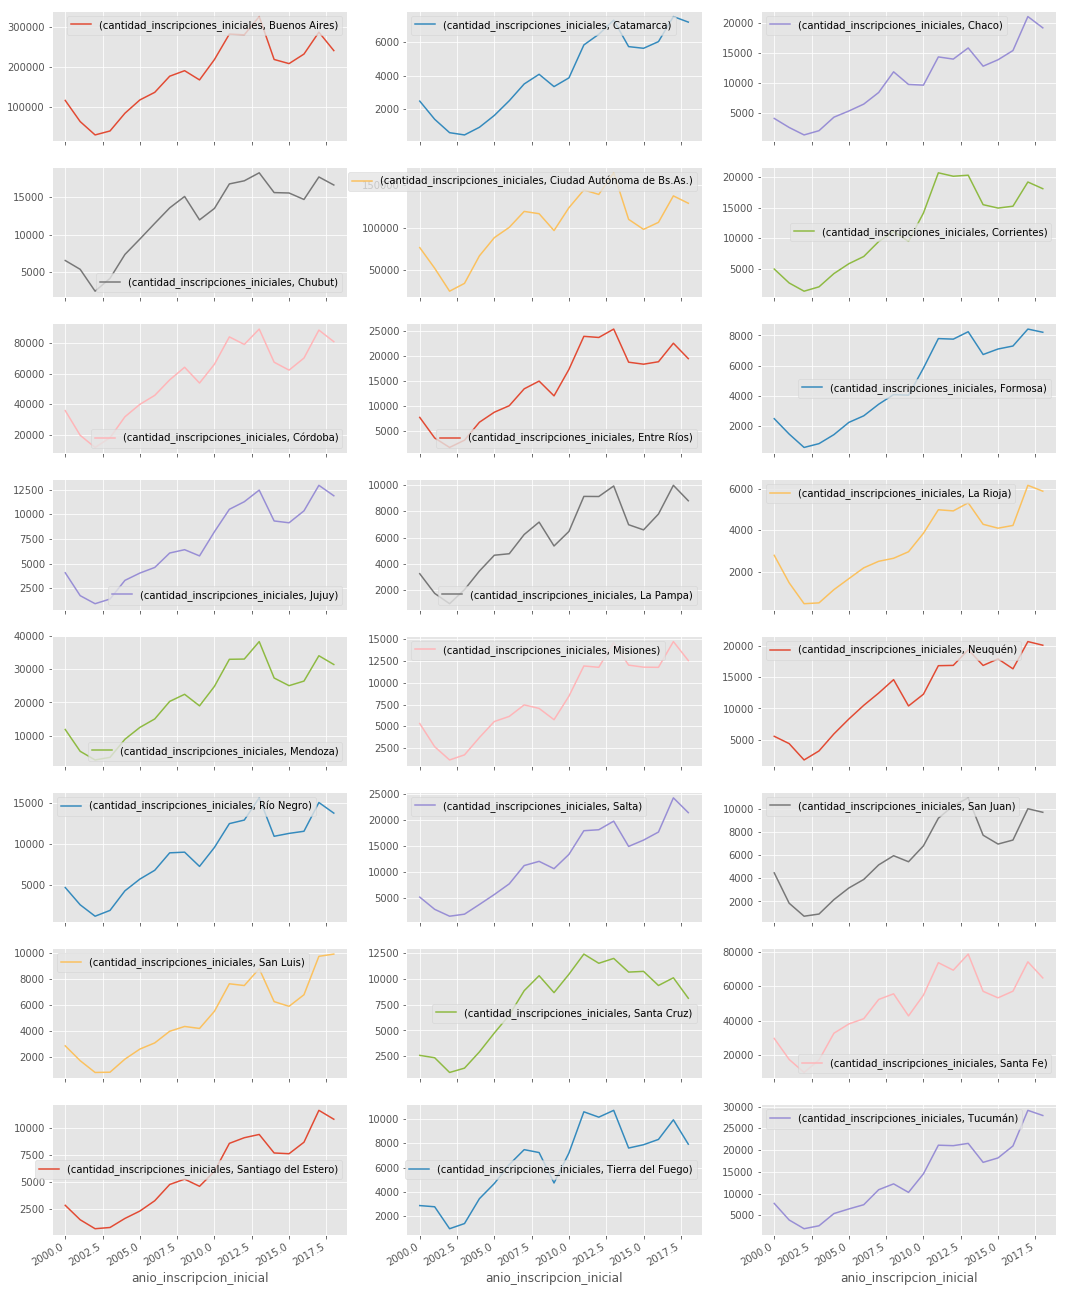

In [183]:
autos_series_provinciales.plot(figsize=(18,25), subplots=True, layout=(8,3))

Este gráfico ofrece un poco más de información: la provincia de Santa Cruz viene disminuyendo sus patentamientos desde 2010 mientras que la provincia del Chaco parece tener el ritmo de crecimiento más sostenido de todas.

De todas maneras son provincias de tamaño muy diferente entre sí. Algunas pueden tener el mercado saturado de autos (y crecer menos por eso) mientras que en otras todavía muy pocos tengan auto (y esta sea todavía una prioridad, más inmune a los cambios del ciclo económico de corto plazo).

## Cruzar datos

Para esto vamos a usar los ids de INDEC por provincia y los datos de población que están en el repositorio.

In [189]:
poblacion = pd.read_csv("data/poblacion.csv")
poblacion

,anio,provincia_id,poblacion
0,2010,2,3028481
1,2010,6,15716942
2,2010,10,377676
3,2010,14,3373025
4,2010,18,1017731
5,2010,22,1080017
6,2010,26,513433
7,2010,30,1255574
8,2010,34,551626
9,2010,38,683513


Necesitamos volver a construir la tabla de datos por provincia, pero conservando el id.

In [190]:
# agrupamos por año y por provincia, conservando los ids y reiniciando el índice
autos_anio_prov_id = autos[autos.anio_inscripcion_inicial < 2019].groupby(
    ["anio_inscripcion_inicial", "provincia_inscripcion_inicial", "provincia_indec_id"]
).sum()["cantidad_inscripciones_iniciales"].reset_index()

autos_anio_prov_id

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,cantidad_inscripciones_iniciales
0,2000,Buenos Aires,6,116665
1,2000,Catamarca,10,2469
2,2000,Chaco,22,4117
3,2000,Chubut,26,6550
4,2000,Ciudad Autónoma de Bs.As.,2,76343
5,2000,Corrientes,18,5027
6,2000,Córdoba,14,35797
7,2000,Entre Ríos,30,7688
8,2000,Formosa,34,2461
9,2000,Jujuy,38,4087


In [193]:
autos_poblacion = autos_anio_prov_id.merge(poblacion, 
                         left_on=["anio_inscripcion_inicial", "provincia_indec_id"],
                         right_on=["anio", "provincia_id"]
                        )

autos_poblacion

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,cantidad_inscripciones_iniciales,anio,provincia_id,poblacion
0,2010,Buenos Aires,6,219215,2010,6,15716942
1,2010,Catamarca,10,3860,2010,10,377676
2,2010,Chaco,22,9658,2010,22,1080017
3,2010,Chubut,26,13513,2010,26,513433
4,2010,Ciudad Autónoma de Bs.As.,2,123518,2010,2,3028481
5,2010,Corrientes,18,14119,2010,18,1017731
6,2010,Córdoba,14,66129,2010,14,3373025
7,2010,Entre Ríos,30,17317,2010,30,1255574
8,2010,Formosa,34,5828,2010,34,551626
9,2010,Jujuy,38,8247,2010,38,683513


In [194]:
autos_poblacion["autos_patent_1000hab"] = autos_poblacion.cantidad_inscripciones_iniciales / (autos_poblacion.poblacion/1000)

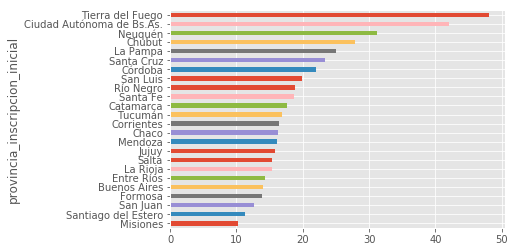

In [206]:
autos_poblacion[autos_poblacion.anio == 2018].set_index("provincia_inscripcion_inicial")["autos_patent_1000hab"].sort_values().plot("barh")

En parte, lo que observamos antes se debe _efectivamente_ a que Santa Cruz es un mercado más saturado para autos que Chaco. Sin embargo ambas provincias están rodeadas de ejemplos similares donde no resaltó un comportamiento similar. 

Veamos si esto fue siempre así, o si fue cambiando con el tiempo. Como alternativa a los gráficos que ya vimos, en este caso puede ser conveniente hacer un mapa de calor.

Para eso primero hay que hacer una tabla dinámica con los datos que queremos ver: año, provincia y cantidad de patentamientos c/1000 habitantes.

In [228]:
evolucion_patent_prov = autos_poblacion[
    ["anio", "provincia_inscripcion_inicial", "autos_patent_1000hab"]
].pivot_table(index="anio", columns="provincia_inscripcion_inicial").sort_values(2018, axis=1)

evolucion_patent_prov

autos_patent_1000hab                      \
provincia_inscripcion_inicial             Misiones Santiago del Estero   
anio                                                                     
2010                                      7.609054            6.808106   
2011                                     10.582053            9.665744   
2012                                     10.305990           10.147092   
2013                                     12.621556           10.372489   
2014                                     10.252507            8.382100   
2015                                      9.927311            8.217891   
2016                                      9.789218            9.270778   
2017                                     12.103997           12.303675   
2018                                     10.191562           11.310189   

                                                                             \
provincia_inscripcion_inicial   San Juan    Formosa Buenos Aires Entre Ríos   
anio                                                                          
2010                            9.771921  10.565129    13.947688  13.792098   
2011                           13.039060  13.985424    17.791577  18.872996   
2012                           14.383658  13.781241    17.462435  18.500996   
2013                           15.164235  14.514429    20.071335  19.613611   
2014                           10.569435  11.731841    13.313487  14.337800   
2015                            9.414595  12.255503    12.544470  13.892683   
2016                            9.771394  12.483451    13.830362  14.123758   
2017                           13.234232  14.283389    16.906451  16.744242   
2018                           12.687321  13.802050    14.050967  14.313720   

                                                                           \
provincia_inscripcion_inicial   La Rioja      Salta      Jujuy    Mendoza   
anio                                                                        
2010                           11.264456  10.775467  12.065608  14.003765   
2011                           14.382982  14.227679  15.188213  18.345959   
2012                           14.023650  14.162977  16.091220  18.157757   
2013                           14.916815  15.229053  17.544897  20.791470   
2014                           11.839329  11.316426  12.983834  14.675323   
2015                           11.163142  12.070963  12.572481  13.286302   
2016                           11.365617  13.050734  14.064371  13.858089   
2017                           16.352464  17.675181  17.369963  17.654374   
2018                           15.390637  15.391795  15.768858  16.112508   

                                    ...                               \
provincia_inscripcion_inicial       ...          Santa Fe  Río Negro   
anio                                ...                                
2010                                ...         16.823378  14.756038   
2011                                ...         22.425830  18.935862   
2012                                ...         20.923804  19.296716   
2013                                ...         23.549426  23.005405   
2014                                ...         16.927819  15.856333   
2015                                ...         15.674613  16.134525   
2016                                ...         16.676222  16.276829   
2017                                ...         21.478866  20.936595   
2018                                ...         18.621496  18.876913   

                                                                           \
provincia_inscripcion_inicial   San Luis    Córdoba Santa Cruz   La Pampa   
anio                                                                        
2010                           12.411475  19.605250  37.890449  19.787297   
2011                           16.903697  24.621802  43.556224  27.659355   
2012             

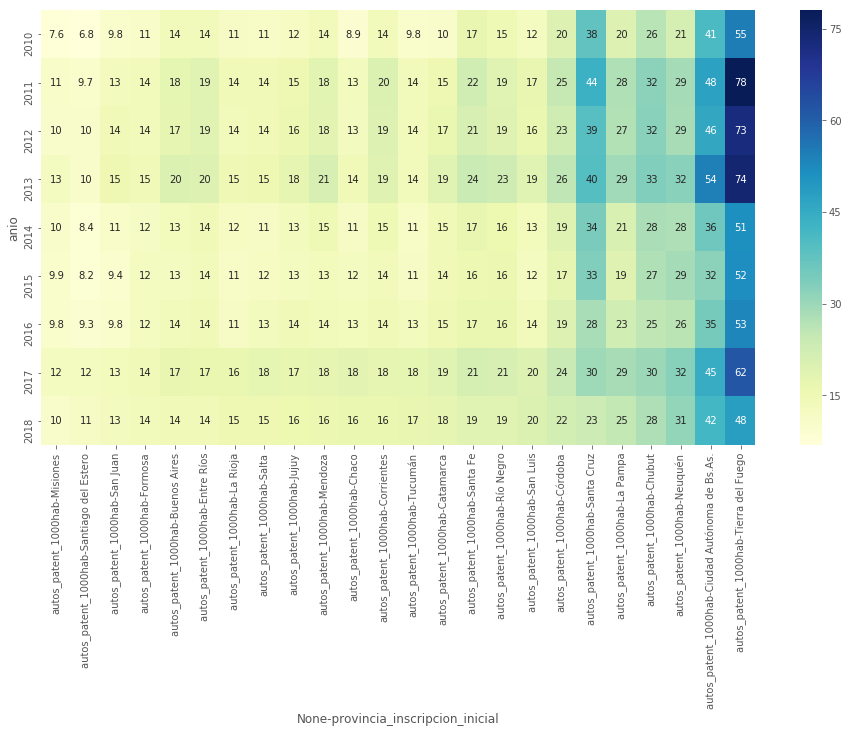

In [230]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(evolucion_patent_prov, annot=True, cmap="YlGnBu")

Es difícil ver la evolución de la mayoría de las provincias con los "outliers" de Tierra del Fuego y la CABA. Para esto podemos limitar el rango de colores, por ejemplo poniendo el máximo más cerca de valores a los que alcancen otras provincias.

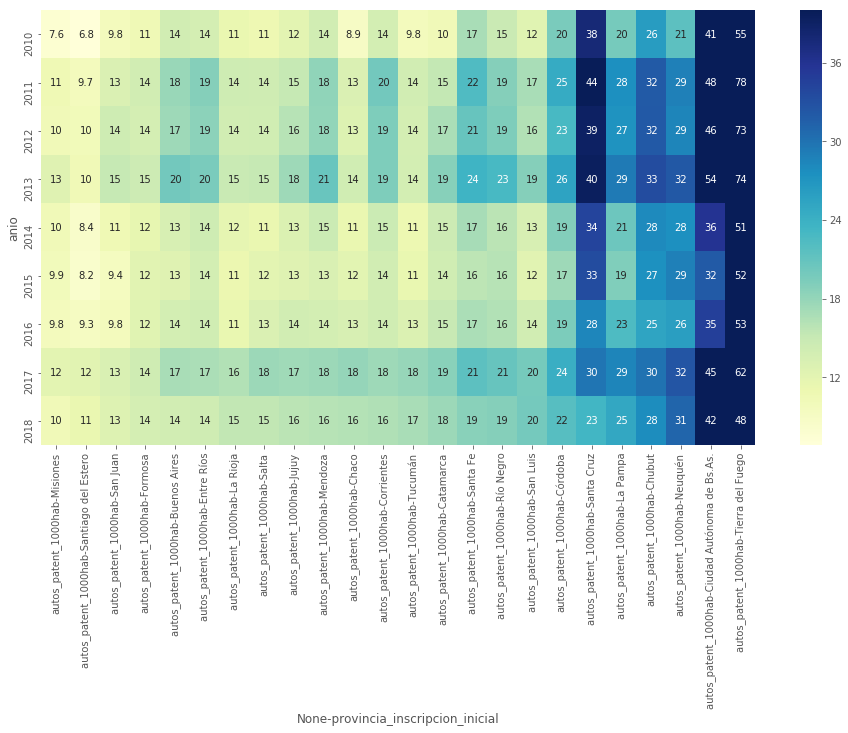

In [233]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(evolucion_patent_prov, annot=True, cmap="YlGnBu", vmax=40)